<a href="https://colab.research.google.com/github/aadam873/Mytest/blob/master/2023_BootCamp_Day2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Acknowledgments/Credits: The material for this bootcamp is based on lectures from Univeristy of Maryland, College Park GRADMAP and Scientific Computing from Scratch 2022. 

## **Please make your own copy of this notebook before making changes or beginning the exercises!**

#Day 2 Python Boot Camp
## Agenda
1. [**NumPy**](#numpy)

    * NumPy exercises
2. [**Pandas**](#pandas)

    * Pandas exercises
3. [**Matplotlib**](#matplotlib)

    * Plotting exercises
4. [**Packages and Documentation**](#packdoc)
5. [**Using Python beyond bootcamp**](#beyond)
6. [**GitHub**](#github)

## 1. Numpy
<a id='numpy'></a>

Numpy comes with powerful features
- a powerful N-dimensional array object
- sophisticated (broadcasting) functions
- tools for integrating C/C++ and Fortran code
- useful linear algebra, Fourier transform, and random number capabilities

In [ ]:
import numpy as np

Numpy is important for mathematics (trigonometry, linear algebra, calculus, statistics, optimization, and more).

It's at the core of scientific computing in Python. It provides arrays, matrices, and fast routines such as additions, dot products, or sorting. 

At the core of the package is the **n-dimensional array**. Numpy arrays have **fixed sizes and datatypes** (as opposed to lists). 

In [ ]:
# One dimensional array (a vector)
x = np.array([1, 2, 3]) 

# Two dimensional array (a matrix)
y = np.array([[1, 2, 3],[4, 5, 6]])

These arrays can be represented in mathematical formalism as
$$ x = \begin{pmatrix} 1 & 2 & 3 \end{pmatrix}$$
and 
$$ y = \begin{pmatrix}
1 & 2 & 3\\
4 & 5 & 6
\end{pmatrix} $$

In [ ]:
# Array attributes

print('shape: ', x.shape, y.shape)
print('size: ', x.size, y.size)
print('type: ', x.dtype, y.dtype)
print('ndim: ', x.ndim, y.ndim)

shape:  (3,) (2, 3)
size:  3 6
type:  int64 int64
ndim:  1 2


Vectorization gives numpy a significant speed advantage. Looops over indices are handled by pre-compiled C-code in the background.

To see the difference, let's compare addition using lists and numpy arrays.

In [ ]:
list1 = [i for i in range(1000)]
list2 = [3*i for i in range(1000)]
array1 = np.array(list1)
array2 = np.array(list2)

In [ ]:
%timeit -n 1_000 array1 - 2*array2;

The slowest run took 7.09 times longer than the fastest. This could mean that an intermediate result is being cached.
12.5 µs ± 10.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
%timeit -n 1_000 [x - 2*y for x, y in zip(list1, list2)]

417 µs ± 131 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Very often we generate arrays that have a structure. For generating arrays that are in order and evenly spaced, it is useful to use the arange function in Numpy.

In [ ]:
z = np.arange(1, 2000)

You can prescribe the increment

In [ ]:
np.arange(0, 3, 0.5)

array([0. , 0.5, 1. , 1.5, 2. , 2.5])

Sometimes we want to guarantee a start and end point for an array but still have evenly spaced elements. For instance, we may want an array that starts at 1, ends at 8, and has exactly 10 elements. For this purpose you can use the function `np.linspace`.

In [ ]:
grid = np.linspace(-1, 1, 21)
grid

array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
        0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])

In [ ]:
np.linspace?

Arithmetic operations work as in linear algebra. For example, operations between a scalar and an array are performed element-wise.

In [ ]:
2*grid

array([-2. , -1.8, -1.6, -1.4, -1.2, -1. , -0.8, -0.6, -0.4, -0.2,  0. ,
        0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ])

In [ ]:
grid+5

array([4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. ])

Numpy has its own random package

In [ ]:
x = np.random.rand(100)
y = np.random.rand(100)

In [ ]:
%%timeit -n 1_000
for i in range(0, len(x)):
    x[i] + y[i]

26.7 µs ± 2.33 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
%%timeit -n 1_000
x+y;

941 ns ± 47.8 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Vectorization is much faster.

Such differences matter in modern data science and machine learning applications. A computation that runs for 2 weeks without vectorization can run in an afternoon with vectorization.

### Defining Numpy Arrays

In [ ]:
int_array = np.array([1, 2, 3])
print(int_array)

[1 2 3]


In [ ]:
type(int_array)

numpy.ndarray

In [ ]:
print(int_array.dtype)

int64


### Numpy Arrays

ordered, indexed, mutable, allows duplicates *(same as list)*




However, arrays differ from lists in 2 key ways:
> 1. All elements should be of the same data type

In [ ]:
str_array = np.array(['1', '2', '3'])
print(str_array)

['1' '2' '3']


In [ ]:
int_str_array = np.array([1, 2, '3'])
print(int_str_array)

['1' '2' '3']


In [ ]:
int_float_array = np.array([1, 2, 3.0])
print(int_float_array)

[1. 2. 3.]


> 2. Allows access to mathematical operations

In [ ]:
a_list = [1, 1, 1]
b_list = [2, 2, 2]

add_list = a_list + b_list

print(add_list)

In [ ]:
add_list = []
for x in range(3):
   add_list.append(a_list[x] + b_list[x])

print(add_list)

[3, 3, 3]


In [ ]:
a_array = np.array(a_list)
b_array = np.array(b_list)

add_array = a_array + b_array

print(add_array)

[3 3 3]


In [ ]:
print(np.concatenate([a_array, b_array]))

[1 1 1 2 2 2]


### Working with Numpy Arrays

Element wise mathematical operations

In [ ]:
a_array = np.array([1, 2, 3])

In [ ]:
# array of same size
b_array = np.array([4, 5, 6])

print('element wise addition', a_array + b_array)
print('element wise substraction', a_array - b_array)
print('element wise multiplication', a_array * b_array)
print('element wise division', a_array / b_array)

element wise addition [5 7 9]
element wise substraction [-3 -3 -3]
element wise multiplication [ 4 10 18]
element wise division [0.25 0.4  0.5 ]


Element wise logical comparisons

In [ ]:
c_array = np.random.rand(4,3)
print(c_array)

[[0.98233522 0.17501737 0.25993696]
 [0.8514342  0.10698434 0.97058832]
 [0.20397343 0.63558226 0.96992707]
 [0.12214412 0.38667572 0.16478714]]


In [ ]:
print(c_array > 0.5)

[[ True False False]
 [ True False  True]
 [False  True  True]
 [False False False]]


In [ ]:
print(c_array[c_array > 0.5])

[0.98233522 0.8514342  0.97058832 0.63558226 0.96992707]


In [ ]:
d_array = np.random.rand(4,3)
print(d_array)

[[0.17435316 0.86768591 0.14521217]
 [0.22178584 0.42266857 0.72022556]
 [0.26885649 0.79564942 0.48505827]
 [0.76110326 0.558028   0.69845835]]


In [ ]:
print(c_array > d_array)

[[ True False  True]
 [ True False  True]
 [False False  True]
 [False False False]]


Indexing

In [ ]:
print(c_array)

[[0.98233522 0.17501737 0.25993696]
 [0.8514342  0.10698434 0.97058832]
 [0.20397343 0.63558226 0.96992707]
 [0.12214412 0.38667572 0.16478714]]


In [ ]:
print(c_array[0,0])

0.9823352226556435


In [ ]:
print(c_array[0,:])

[0.98233522 0.17501737 0.25993696]


In [ ]:
print(c_array[1:,1:])

[[0.10698434 0.97058832]
 [0.63558226 0.96992707]
 [0.38667572 0.16478714]]


Broadcasting

In [ ]:
print(a_array)
print(a_array.shape)

[1 2 3]
(3,)


In [ ]:
# broadcasting with a scalar
b = 2

print('scalar addition', a_array + b)
print('scalar substraction', a_array - b)
print('scalar multiplication', a_array * b)
print('scalar division', a_array / b)

scalar addition [3 4 5]
scalar substraction [-1  0  1]
scalar multiplication [2 4 6]
scalar division [0.5 1.  1.5]


In [ ]:
print(c_array)
print(c_array.shape)

[[0.98233522 0.17501737 0.25993696]
 [0.8514342  0.10698434 0.97058832]
 [0.20397343 0.63558226 0.96992707]
 [0.12214412 0.38667572 0.16478714]]
(4, 3)


In [ ]:
# broadcasting with an array
print(c_array + a_array)

[[1.98233522 2.17501737 3.25993696]
 [1.8514342  2.10698434 3.97058832]
 [1.20397343 2.63558226 3.96992707]
 [1.12214412 2.38667572 3.16478714]]


In [ ]:
# reshaping array
reshaped_c_array = c_array.reshape(6,2)
print(reshaped_c_array)
print(reshaped_c_array.shape)

[[0.98233522 0.17501737]
 [0.25993696 0.8514342 ]
 [0.10698434 0.97058832]
 [0.20397343 0.63558226]
 [0.96992707 0.12214412]
 [0.38667572 0.16478714]]
(6, 2)


In [ ]:
# broadcasting with an array
print(reshaped_c_array + a_array)

ValueError: ignored

Array axes

In [ ]:
print(c_array)

[[0.98233522 0.17501737 0.25993696]
 [0.8514342  0.10698434 0.97058832]
 [0.20397343 0.63558226 0.96992707]
 [0.12214412 0.38667572 0.16478714]]


In [ ]:
print(np.mean(c_array))

0.4857821803228653


In [ ]:
print(np.mean(c_array, axis=0))

[0.53997174 0.32606492 0.59130988]


In [ ]:
print(np.mean(c_array, axis=1))

[0.47242985 0.64300229 0.60316092 0.22453566]


### Numpy Exercises

1. Create an array named `x` of values from 0 to 10 (including 10) in steps of 0.1. (Hint: use np.arange or np.linspace). 

>Print:


> a. Everything up to and including the tenth element of `x`

>b. The first half of `x`

>c. The middle sixty elements of `x`

>d. The last 20 elements of `x`

>e. All elements of `x` up to, but not including the 17th element

>f. Create a new array named `y` that contains the 12th through 38th elements of `x`, including the 38th element







2. Use a `while` loop to make an array of 10 numbers. Let each element be increased by 2 compared with the previous element. The first element of the array should be 1.

3. For a given set of points, the **pathlength** $L$ from $(x_0,y_0)$ to $(x_n,y_n)$ is given by the following expression,
\begin{gather}
L = \sum_{i = 1}^n \sqrt{ \left(x_i - x_{i-1}\right)^2 + \left(y_i - y_{i-1} \right)^2}
\end{gather}

What this quantity represents is the sum of the **lengths** between $(x_{i-1},y_{i-1})$ and $(x_i,y_i)$ for $i$ between 1 and $n$.

Write a function `pathLength` which computes $L$ given two numpy arrays `x_array` and `y_array` as input variables.

4. Create 2 NumPy arrays `a` and `b`, consisting of 15 numbers generated using `np.random`. Create a function that outputs an array of shared elements of a and b. 

5. Using the lines of code below, create a NumPy array `iris_2D` from sample data. Write a function to remove all of the `NaN` values from the array.

```
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris_2d = np.genfromtxt(url, delimiter=',', dtype='float', usecols=[0,1,2,3])
```

## 2. Pandas
<a id='pandas'></a>

### Data handling

Storing data and the results of your programming efforts is important for working over multiple sessions and sharing your results with collaborators. When Python closes, all the variables in the memory are lost, so data must be stored in the file system. 

To work with text files, we need to use open function which returns a file object. It is commonly used with two arguments:

```
f = open(filename, mode) 
```

`f` is the returned file object. The filename is a string where the location of the file you want to open, and the mode is another string containing a few characters describing the way in which the file will be used, the common modes are:

- ‘r’, this is the default mode, which opens a file for reading
- ‘w’, this mode opens a file for writing, if the file does not exist, it creates a new file.
- ‘a’, open a file in append mode, append data to end of file. If the file does not exist, it creates a new file.
- ‘b’, open a file in binary mode.
- ‘r+’, open a file (do not create) for reading and writing.
- ‘w+’, open or create a file for writing and reading, discard existing contents.
- ‘a+’, open or create file for reading and writing, and append data to end of file.


Write into a file

In [ ]:
f = open('test.txt', 'w')
for i in range(5):
    f.write(f"This is line {i}\n")
    
f.close()

Append into an existing file

In [ ]:
f = open('test.txt', 'a')
f.write(f"This is another line\n")
f.close()

Read a file

In [ ]:
f = open('./test.txt', 'r')
content = f.read()
f.close()
print(content)

This is line 0
This is line 1
This is line 2
This is line 3
This is line 4
This is another line



Using this way, we could store all the lines in the file into one string variable, we could verify that variable content is a string.

In [ ]:
type(content)

str

But sometimes we want to read in the contents in the files line by line and store it in a list. We could use `f.readlines()` to achieve this.

In [ ]:
f = open('./test.txt', 'r')
contents = f.readlines()
f.close()
print(contents)
print(type(contents))

['This is line 0\n', 'This is line 1\n', 'This is line 2\n', 'This is line 3\n', 'This is line 4\n', 'This is another line\n']
<class 'list'>


When we work with numbers or arrays, we can use the numpy package to directly save/read an array.

In [ ]:
arr = np.array([[1.20, 2.20, 3.00], [4.14, 5.65, 6.42]])

In [ ]:
np.savetxt('my_arr.txt', arr, fmt='%.2f', header = 'Col1 Col2 Col3')

The first argument is the file name, second argument is the arr object we save, and the third argument is the format for the output (‘%.2f’ indicates 2 decimals). The fourth argument is the header.

We can load the array back into memory as follows.

In [ ]:
my_arr = np.loadtxt('my_arr.txt')

Scientific data are sometimes stored in the comma-separated values (CSV) file format, a delimited text file that uses a comma to separate values. It is a very useful format that can store large tables of data (numbers and text) in plain text. Each line (row) in the data is one data record, and each record consists of one or more fields, separated by commas. It also can be opened using Microsoft Excel.

Python has its own csv module that could handle the reading and writing of the csv file, but we can also use numpy.

In [ ]:
data = np.random.random((100,5))
np.savetxt('test.csv', data, fmt = '%.2f', delimiter=',', header = 'c1, c2, c3, c4, c5')

### Creating a Pandas Dataframe

In [ ]:
import pandas as pd

data = {'exp_name': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
        'solvent': ['MeOH', 'DCM', 'EtOAc', 'Toluene', 'hexanes', 'MeOH', 'DCM', 'EtOAc', 'Toluene', 'hexanes'],
        'temp_C': [60, 60, 60, 60, 60, 80, 80, 80, 80, 80],
        'pdt_a_yield': [50, 65, 40, 30, 5, 60, 75, 50, 40, 10],
        'side_pdt_yield': [20, 5, 30, 5, 15, 25, 5, 35, 10, 20]
        }

# create pandas dataframe from a dictionary
df = pd.DataFrame(data)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   exp_name        10 non-null     object
 1   solvent         10 non-null     object
 2   temp_C          10 non-null     int64 
 3   pdt_a_yield     10 non-null     int64 
 4   side_pdt_yield  10 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 528.0+ bytes


In [ ]:
df.head()

,exp_name,solvent,temp_C,pdt_a_yield,side_pdt_yield
0,A,MeOH,60,50,20
1,B,DCM,60,65,5
2,C,EtOAc,60,40,30
3,D,Toluene,60,30,5
4,E,hexanes,60,5,15


In [ ]:
df.tail()

,exp_name,solvent,temp_C,pdt_a_yield,side_pdt_yield
5,F,MeOH,80,60,25
6,G,DCM,80,75,5
7,H,EtOAc,80,50,35
8,I,Toluene,80,40,10
9,J,hexanes,80,10,20


In [ ]:
# create pandas dataframe from a csv file
# you need to have a csv uploaded to the CoLab environment in order to do it this way
path = '/content/data.csv'
df_csv = pd.read_csv(path)

# pandas can also read json, pickle, sql, etc. files

FileNotFoundError: ignored

### Using Pandas for Data Analysis

Accessing data using row and column numbers

In [ ]:
df

,exp_name,solvent,temp_C,pdt_a_yield,side_pdt_yield
0,A,MeOH,60,50,20
1,B,DCM,60,65,5
2,C,EtOAc,60,40,30
3,D,Toluene,60,30,5
4,E,hexanes,60,5,15
5,F,MeOH,80,60,25
6,G,DCM,80,75,5
7,H,EtOAc,80,50,35
8,I,Toluene,80,40,10
9,J,hexanes,80,10,20


In [ ]:
df.iloc[2,4]

30

In [ ]:
df.iloc[2]

exp_name              C
solvent           EtOAc
temp_C               60
pdt_a_yield          40
side_pdt_yield       30
Name: 2, dtype: object

In [ ]:
df.iloc[:,1:3]

,solvent,temp_C
0,MeOH,60
1,DCM,60
2,EtOAc,60
3,Toluene,60
4,hexanes,60
5,MeOH,80
6,DCM,80
7,EtOAc,80
8,Toluene,80
9,hexanes,80


Accessing column(s) of data by column names

In [ ]:
df

,exp_name,solvent,temp_C,pdt_a_yield,side_pdt_yield
0,A,MeOH,60,50,20
1,B,DCM,60,65,5
2,C,EtOAc,60,40,30
3,D,Toluene,60,30,5
4,E,hexanes,60,5,15
5,F,MeOH,80,60,25
6,G,DCM,80,75,5
7,H,EtOAc,80,50,35
8,I,Toluene,80,40,10
9,J,hexanes,80,10,20


In [ ]:
df.columns

Index(['exp_name', 'solvent', 'temp_C', 'pdt_a_yield', 'side_pdt_yield'], dtype='object')

In [ ]:
# series
df['solvent']
# type(df['solvent'])
# df['solvent'].shape

0       MeOH
1        DCM
2      EtOAc
3    Toluene
4    hexanes
5       MeOH
6        DCM
7      EtOAc
8    Toluene
9    hexanes
Name: solvent, dtype: object

In [ ]:
# dataframe
df[['solvent', 'temp_C']]
# type(df[['solvent', 'temp_C']])
# df[['solvent', 'temp_C']].shape

,solvent,temp_C
0,MeOH,60
1,DCM,60
2,EtOAc,60
3,Toluene,60
4,hexanes,60
5,MeOH,80
6,DCM,80
7,EtOAc,80
8,Toluene,80
9,hexanes,80


Accessing data by row and column names

In [ ]:
df

,exp_name,solvent,temp_C,pdt_a_yield,side_pdt_yield
0,A,MeOH,60,50,20
1,B,DCM,60,65,5
2,C,EtOAc,60,40,30
3,D,Toluene,60,30,5
4,E,hexanes,60,5,15
5,F,MeOH,80,60,25
6,G,DCM,80,75,5
7,H,EtOAc,80,50,35
8,I,Toluene,80,40,10
9,J,hexanes,80,10,20


In [ ]:
df.loc[0,'solvent']

'MeOH'

In [ ]:
df.set_index('exp_name')

,solvent,temp_C,pdt_a_yield,side_pdt_yield
exp_name,,,,
A,MeOH,60,50,20
B,DCM,60,65,5
C,EtOAc,60,40,30
D,Toluene,60,30,5
E,hexanes,60,5,15
F,MeOH,80,60,25
G,DCM,80,75,5
H,EtOAc,80,50,35
I,Toluene,80,40,10


In [ ]:
df.loc['A', 'solvent']

KeyError: ignored

In [ ]:
df = df.set_index('exp_name')
# df.set_index('exp_name', inplace=True)

In [ ]:
df.loc['A', 'solvent']

'MeOH'

In [ ]:
df

,solvent,temp_C,pdt_a_yield,side_pdt_yield
exp_name,,,,
A,MeOH,60,50,20
B,DCM,60,65,5
C,EtOAc,60,40,30
D,Toluene,60,30,5
E,hexanes,60,5,15
F,MeOH,80,60,25
G,DCM,80,75,5
H,EtOAc,80,50,35
I,Toluene,80,40,10


In [ ]:
df = df.reset_index()
# df.reset_index(inplace=True)

In [ ]:
df.head(3)

,exp_name,solvent,temp_C,pdt_a_yield,side_pdt_yield
0,A,MeOH,60,50,20
1,B,DCM,60,65,5
2,C,EtOAc,60,40,30


Mathematical operations

In [ ]:
df['pdt_a_yield'].mean()

42.5

In [ ]:
df[['pdt_a_yield', 'side_pdt_yield']].median()

pdt_a_yield       45.0
side_pdt_yield    17.5
dtype: float64

In [ ]:
df['pdt_a_yield'] - 5

0    45
1    60
2    35
3    25
4     0
5    55
6    70
7    45
8    35
9     5
Name: pdt_a_yield, dtype: int64

In [ ]:
df['pdt_a_yield']

0    50
1    65
2    40
3    30
4     5
5    60
6    75
7    50
8    40
9    10
Name: pdt_a_yield, dtype: int64

In [ ]:
df['corr_pdt_a_yield'] = df['pdt_a_yield'] - 5

In [ ]:
df

,exp_name,solvent,temp_C,pdt_a_yield,side_pdt_yield,corr_pdt_a_yield
0,A,MeOH,60,50,20,45
1,B,DCM,60,65,5,60
2,C,EtOAc,60,40,30,35
3,D,Toluene,60,30,5,25
4,E,hexanes,60,5,15,0
5,F,MeOH,80,60,25,55
6,G,DCM,80,75,5,70
7,H,EtOAc,80,50,35,45
8,I,Toluene,80,40,10,35
9,J,hexanes,80,10,20,5


Applying a function

In [ ]:
def celsius_to_fahrenheit(celsius_temp):
    fahrenheit = (celsius_temp * 9/5 ) + 32
    return fahrenheit

In [ ]:
df['temp_F'] = df['temp_C'].apply(celsius_to_fahrenheit)

In [ ]:
df

,exp_name,solvent,temp_C,pdt_a_yield,side_pdt_yield,corr_pdt_a_yield,temp_F
0,A,MeOH,60,50,20,45,140.0
1,B,DCM,60,65,5,60,140.0
2,C,EtOAc,60,40,30,35,140.0
3,D,Toluene,60,30,5,25,140.0
4,E,hexanes,60,5,15,0,140.0
5,F,MeOH,80,60,25,55,176.0
6,G,DCM,80,75,5,70,176.0
7,H,EtOAc,80,50,35,45,176.0
8,I,Toluene,80,40,10,35,176.0
9,J,hexanes,80,10,20,5,176.0


Saving a dataframe

In [ ]:
df.to_csv('data_processed.csv', index=False)

Querying a dataframe

In [ ]:
df.query('pdt_a_yield > 50')
# df[df['pdt_a_yield'] > 50]

,exp_name,solvent,temp_C,pdt_a_yield,side_pdt_yield,corr_pdt_a_yield,temp_F
1,B,DCM,60,65,5,60,140.0
5,F,MeOH,80,60,25,55,176.0
6,G,DCM,80,75,5,70,176.0


In [ ]:
df.query('pdt_a_yield > 50 and side_pdt_yield < 10')
# df[(df['pdt_a_yield'] > 50) & (df['side_pdt_yield'] < 10)]

,exp_name,solvent,temp_C,pdt_a_yield,side_pdt_yield,corr_pdt_a_yield,temp_F
1,B,DCM,60,65,5,60,140.0
6,G,DCM,80,75,5,70,176.0


In [ ]:
df.query('pdt_a_yield > side_pdt_yield')
# df[ df['pdt_a_yield'] > df['side_pdt_yield'] ]

,exp_name,solvent,temp_C,pdt_a_yield,side_pdt_yield,corr_pdt_a_yield,temp_F
0,A,MeOH,60,50,20,45,140.0
1,B,DCM,60,65,5,60,140.0
2,C,EtOAc,60,40,30,35,140.0
3,D,Toluene,60,30,5,25,140.0
5,F,MeOH,80,60,25,55,176.0
6,G,DCM,80,75,5,70,176.0
7,H,EtOAc,80,50,35,45,176.0
8,I,Toluene,80,40,10,35,176.0


In [ ]:
df.loc[df['pdt_a_yield'] > 50, 'exp_name']

1    B
5    F
6    G
Name: exp_name, dtype: object

Sorting a dataframe

In [ ]:
df.sort_values(by='pdt_a_yield')

,exp_name,solvent,temp_C,pdt_a_yield,side_pdt_yield,corr_pdt_a_yield,temp_F
4,E,hexanes,60,5,15,0,140.0
9,J,hexanes,80,10,20,5,176.0
3,D,Toluene,60,30,5,25,140.0
2,C,EtOAc,60,40,30,35,140.0
8,I,Toluene,80,40,10,35,176.0
0,A,MeOH,60,50,20,45,140.0
7,H,EtOAc,80,50,35,45,176.0
5,F,MeOH,80,60,25,55,176.0
1,B,DCM,60,65,5,60,140.0
6,G,DCM,80,75,5,70,176.0


In [ ]:
df.sort_values(by='pdt_a_yield', ascending=False)

,exp_name,solvent,temp_C,pdt_a_yield,side_pdt_yield,corr_pdt_a_yield,temp_F
6,G,DCM,80,75,5,70,176.0
1,B,DCM,60,65,5,60,140.0
5,F,MeOH,80,60,25,55,176.0
0,A,MeOH,60,50,20,45,140.0
7,H,EtOAc,80,50,35,45,176.0
2,C,EtOAc,60,40,30,35,140.0
8,I,Toluene,80,40,10,35,176.0
3,D,Toluene,60,30,5,25,140.0
9,J,hexanes,80,10,20,5,176.0
4,E,hexanes,60,5,15,0,140.0


Grouping

In [ ]:
grouped_data = df.groupby(by='solvent')

In [ ]:
grouped_data.groups

{'DCM': [1, 6], 'EtOAc': [2, 7], 'MeOH': [0, 5], 'Toluene': [3, 8], 'hexanes': [4, 9]}

In [ ]:
grouped_data.get_group('DCM')

,exp_name,solvent,temp_C,pdt_a_yield,side_pdt_yield,corr_pdt_a_yield,temp_F
1,B,DCM,60,65,5,60,140.0
6,G,DCM,80,75,5,70,176.0


In [ ]:
grouped_data.mean()

<ipython-input-115-ad2c67e8d48e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data.mean()


,temp_C,pdt_a_yield,side_pdt_yield,corr_pdt_a_yield,temp_F
solvent,,,,,
DCM,70.0,70.0,5.0,65.0,158.0
EtOAc,70.0,45.0,32.5,40.0,158.0
MeOH,70.0,55.0,22.5,50.0,158.0
Toluene,70.0,35.0,7.5,30.0,158.0
hexanes,70.0,7.5,17.5,2.5,158.0


In [ ]:
grouped_data['pdt_a_yield'].mean()

solvent
DCM        70.0
EtOAc      45.0
MeOH       55.0
Toluene    35.0
hexanes     7.5
Name: pdt_a_yield, dtype: float64

In [ ]:
grouped_data[['pdt_a_yield', 'side_pdt_yield']].mean()

,pdt_a_yield,side_pdt_yield
solvent,,
DCM,70.0,5.0
EtOAc,45.0,32.5
MeOH,55.0,22.5
Toluene,35.0,7.5
hexanes,7.5,17.5


Merging dataframes

In [ ]:
df

,exp_name,solvent,temp_C,pdt_a_yield,side_pdt_yield,corr_pdt_a_yield,temp_F
0,A,MeOH,60,50,20,45,140.0
1,B,DCM,60,65,5,60,140.0
2,C,EtOAc,60,40,30,35,140.0
3,D,Toluene,60,30,5,25,140.0
4,E,hexanes,60,5,15,0,140.0
5,F,MeOH,80,60,25,55,176.0
6,G,DCM,80,75,5,70,176.0
7,H,EtOAc,80,50,35,45,176.0
8,I,Toluene,80,40,10,35,176.0
9,J,hexanes,80,10,20,5,176.0


In [ ]:
df_1 = df[['exp_name', 'solvent', 'temp_C', 'temp_F']]
df_2 = df[['exp_name', 'pdt_a_yield', 'side_pdt_yield']]

In [ ]:
df_1

,exp_name,solvent,temp_C,temp_F
0,A,MeOH,60,140.0
1,B,DCM,60,140.0
2,C,EtOAc,60,140.0
3,D,Toluene,60,140.0
4,E,hexanes,60,140.0
5,F,MeOH,80,176.0
6,G,DCM,80,176.0
7,H,EtOAc,80,176.0
8,I,Toluene,80,176.0
9,J,hexanes,80,176.0


In [ ]:
df_2

,exp_name,pdt_a_yield,side_pdt_yield
0,A,50,20
1,B,65,5
2,C,40,30
3,D,30,5
4,E,5,15
5,F,60,25
6,G,75,5
7,H,50,35
8,I,40,10
9,J,10,20


In [ ]:
merged_df = df_1.merge(df_2, on='exp_name')

In [ ]:
merged_df

,exp_name,solvent,temp_C,temp_F,pdt_a_yield,side_pdt_yield
0,A,MeOH,60,140.0,50,20
1,B,DCM,60,140.0,65,5
2,C,EtOAc,60,140.0,40,30
3,D,Toluene,60,140.0,30,5
4,E,hexanes,60,140.0,5,15
5,F,MeOH,80,176.0,60,25
6,G,DCM,80,176.0,75,5
7,H,EtOAc,80,176.0,50,35
8,I,Toluene,80,176.0,40,10
9,J,hexanes,80,176.0,10,20


Refer to Pandas documentation for how to join or concatenate DataFrames

Download data from an online csv file.

In [ ]:
url = 'https://raw.githubusercontent.com/hsiav2000/simple-regression/master/Salary_Data.csv'
salary_data = pd.read_csv(url)

<Axes: xlabel='YearsExperience', ylabel='Salary'>

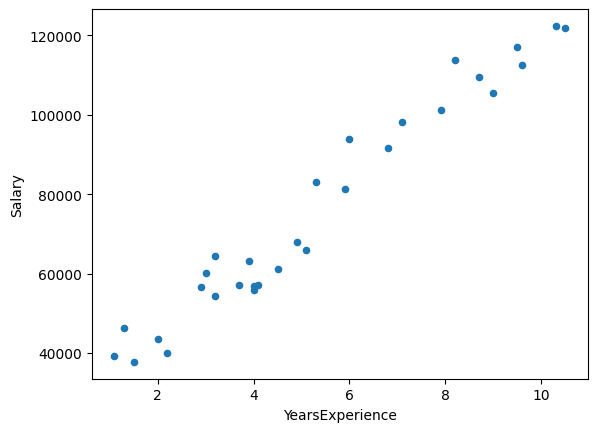

In [ ]:
salary_data.plot.scatter(x='YearsExperience', y='Salary')

### Pandas Exercises

1. Use the income tax function from Day 1 exercise 13 on the `salary_data` DataFrame we created above, add a new column titled `income_tax` for the output.

2. Write a program to create and display a Pandas DataFrame `exam_data` from a Python dictionary of lists with the following key labels:
name: choose 10 first names
score: 10 random numbers between 0 and 20
attempts: 10 random numbers between 1 and 4
qualify: should be a string 'yes' if the score is greater than or equal to 10, 'no' otherwise
labels: lowercase letters a through j


>a. Display all of `exam_data`

>b. Display the first three rows of `exam_data`

>c. Display only the `name` and `score` columns of `exam_data`

>d. Display the `name` and `score` columns in rows 1, 3, 5, 6 of `exam_data`

>e. Use a query to find the number of attempts greater than or equal to 2.

>f. Use a query to find who received a score between 15 and 20 (inclusive).



3. Using the `exam_data` DataFrame above, calculate:


>a. The sum of the examination attempts by the students.

>b. The mean of all students' scores.

>c. The standard deviation of each student's score.



4. Using [this link](https://raw.githubusercontent.com/practiceprobs/datasets/main/netflix-titles/netflix-titles.csv), create a Pandas DataFrame called `Netflix` from the dataset of Netflix titles.


>a. Sort the data based on year. How many titles are there from the year you were born?

>b. How many titles were made in India in 2008?

>c. Group the titles by director, display the groups.

>d. What is the mean of the release year of titles directed by Steven Spielberg?

>e. How much memory does the `Netflix` DataFrame take up?

## 3. Matplotlib
<a id='matplotlib'></a>

Visualizing data is usually the best way to convey important engineering and science ideas and information, especially if the information is made up of many numbers. The ability to visualize and plot data quickly and in many different ways is one of Python’s most powerful features.

Python has numerous graphics functions that enable you to efficiently display plots, surfaces, volumes, vector fields, histograms, animations, and many other data plots. The most common package for visualization in Python is [matplotlib](https://matplotlib.org/).

Have a look at the [matplotlib gallery](https://matplotlib.org/stable/gallery/index.html) and get a sense of what could be done there. We'll cover the basic syntax for plotting here.

### Basic plotting

The matplotlib package is typically used as plt. Pyplot is a useful module within matplotlib for Jupyter notebooks. 

In [ ]:
import matplotlib.pyplot as plt

Given the lists x = [0, 1, 2, 3] and y = [0, 1, 4, 9], use the plot function to produce a plot of x versus y.

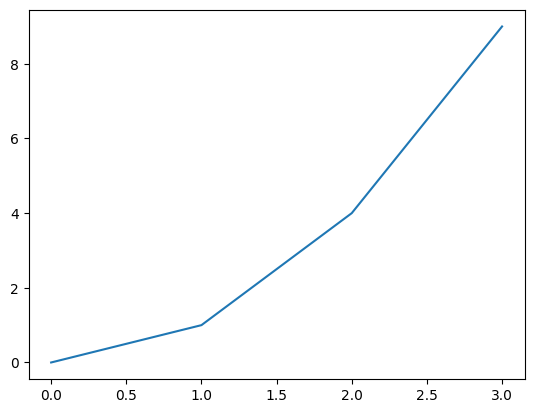

In [ ]:
x = [0, 1, 2, 3] 
y = [0, 1, 4, 9]
plt.plot(x, y)

By default, each point is connected with a blue line. To make the function look smooth, use a finer grid for the x-axis.

Let's plot the parabolic function $y = x^2$ on the domain $x\in[-5,5]$.

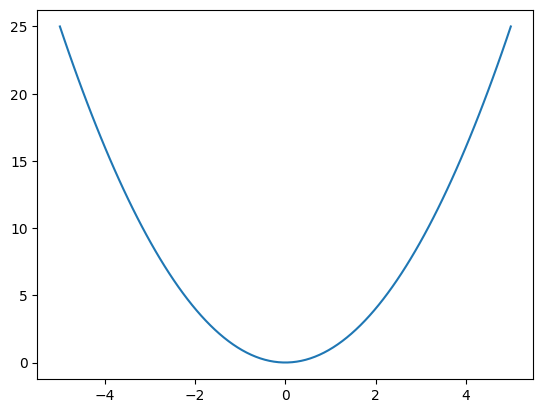

In [ ]:
x = np.linspace(-5,5,100)
y = x**2

plt.plot(x,y)

You can play around with various customizations. Plot the sine function with green dashed lines and a star marking data points.

In [ ]:
x = np.linspace(-np.pi, np.pi, 100)
y = np.sin(x)

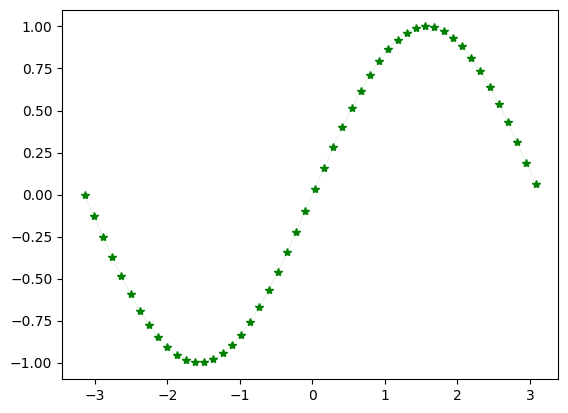

In [ ]:
plt.plot(x[::2], y[::2],'g*--', ms = 6, lw=0.1)

You can chose predefined styles for your plots.

In [ ]:
print(plt.style.available)
# plt.style.use('seaborn-paper')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


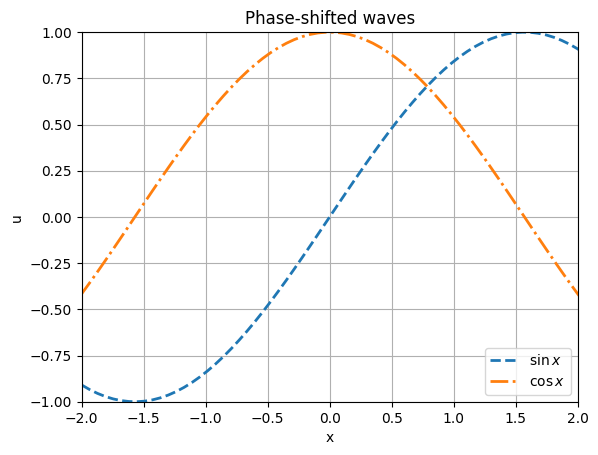

In [ ]:
plt.plot(x,np.sin(x), color='tab:blue',  linestyle='--', linewidth=2, label=r'$\sin x$')
plt.plot(x,np.cos(x), color='tab:orange', linestyle='-.',linewidth=2, label=r'$\cos x$')
plt.title('Phase-shifted waves')
plt.xlabel('x')
plt.ylabel('u')
plt.grid(True)
plt.legend(loc='lower right')
plt.ylim(-1,1)
plt.xlim(-2,2);

Scatter plots work exactly the same as regular plots above except they have default behavior where the dots are not connected.

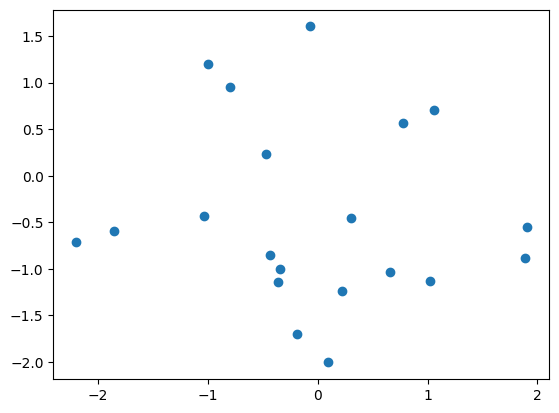

In [ ]:
# Generate 20, normally distributed, random points
x, y = np.random.randn(2, 20)

plt.scatter(x, y)

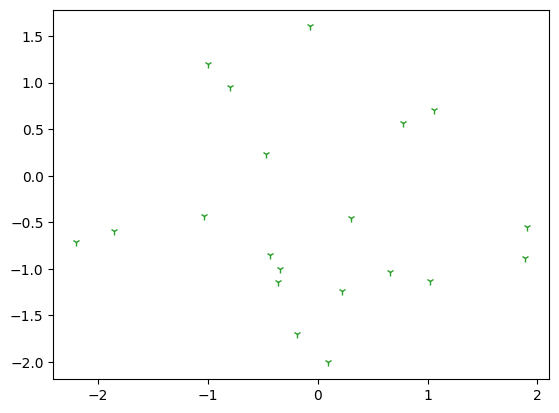

In [ ]:
plt.plot(x, y,"1", color='tab:green')

Data points with a linear relationship

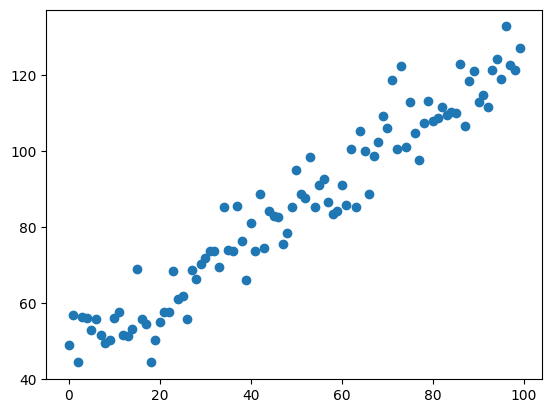

In [ ]:
x = np.arange(100)
delta = np.random.poisson(40, size=100)

y = 0.8*x + 5 + delta

plt.scatter(x, y)

There are several other plotting functions that plot x versus y data. Some of them are `bar`, `loglog`, `semilogx`, and `semilogy`.  The bar function plots bars centered at x with height y. The loglog, semilogx, and semilogy functions plot the data in x and y with the x and y axis on a log scale, the x axis on a log scale and the y axis on a linear scale, and the y axis on a log scale and the x axis on a linear scale, respectively.

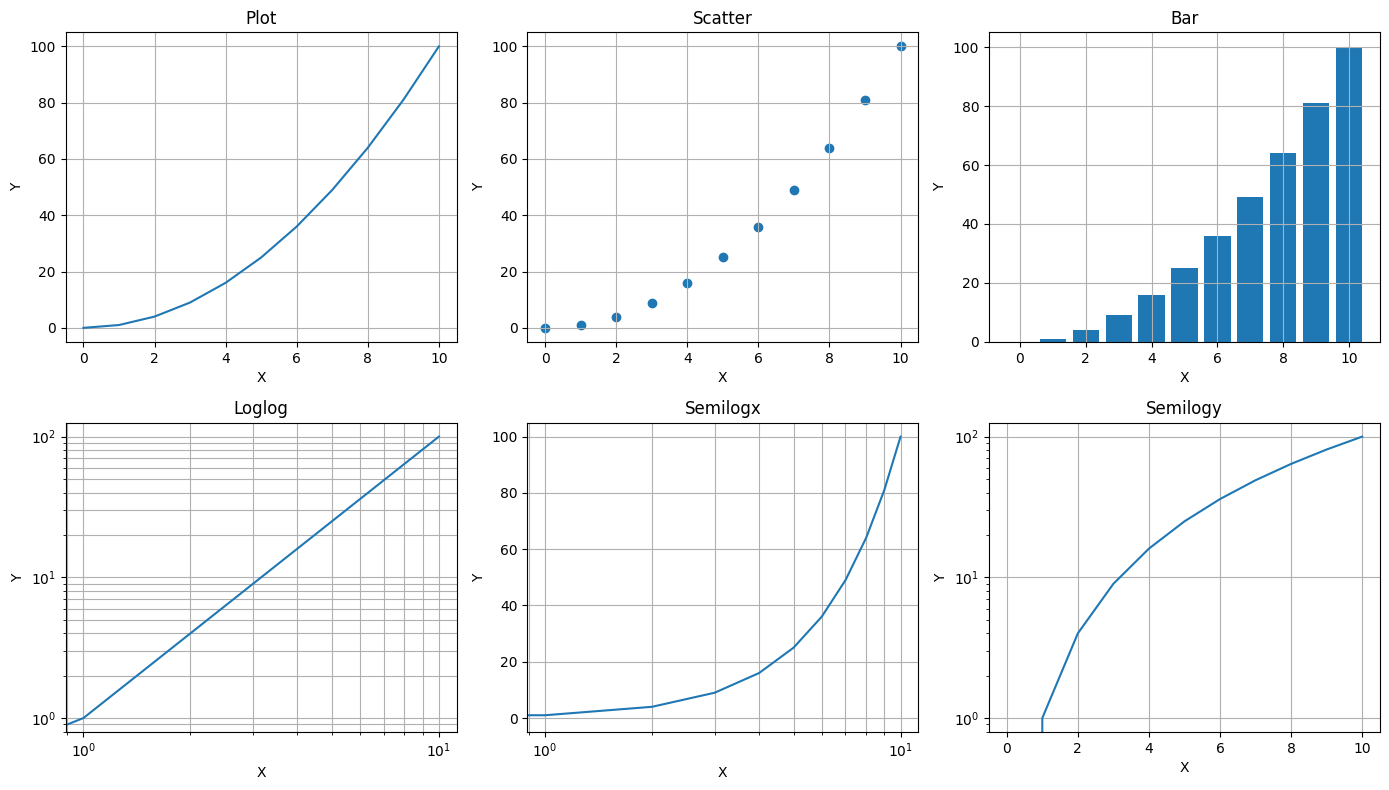

In [ ]:
x = np.arange(11)
y = x**2

plt.figure(figsize = (14, 8))

plt.subplot(2, 3, 1)
plt.plot(x,y)
plt.title('Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()

plt.subplot(2, 3, 2)
plt.scatter(x,y)
plt.title('Scatter')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()

plt.subplot(2, 3, 3)
plt.bar(x,y)
plt.title('Bar')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()

plt.subplot(2, 3, 4)
plt.loglog(x,y)
plt.title('Loglog')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(which='both')

plt.subplot(2, 3, 5)
plt.semilogx(x,y)
plt.title('Semilogx')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(which='both')

plt.subplot(2, 3, 6)
plt.semilogy(x,y)
plt.title('Semilogy')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()

plt.tight_layout()


The statement `plt.tight_layout` ensures that the sub-figures not overlap with each other.

Sometimes, you want to save the figures in a specific format, such as pdf, jpeg, png, and so on. You can do this with the function plt.savefig.

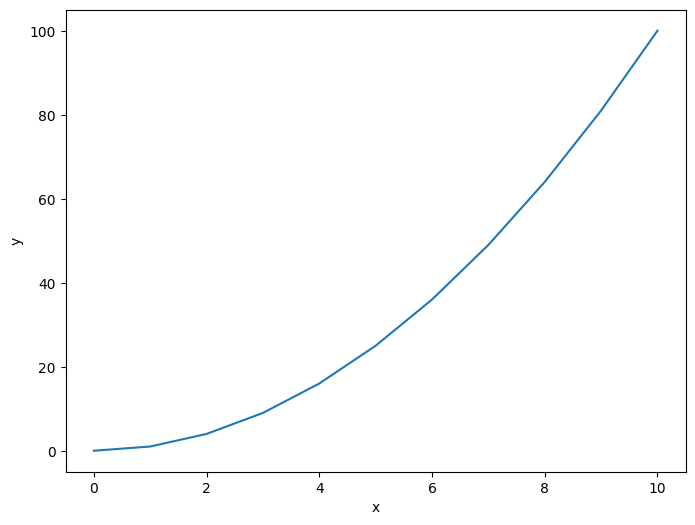

In [ ]:
plt.figure(figsize = (8,6))
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('image.pdf')

Data points with a linear relationship

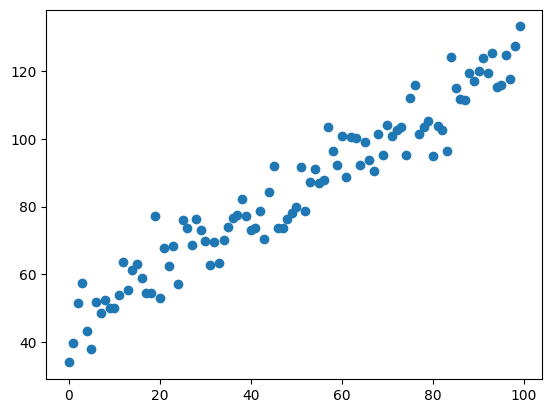

In [ ]:
x = np.arange(100)
delta = np.random.poisson(40, size=100)

y = 0.8*x + 5 + delta

plt.scatter(x, y)

### "Object-oriented" plotting

So far, we used the procedural interface to make plots. You can get more granular control of yor plot by using the object-oriented interface.

You start the plot with the figure object.

In [ ]:
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

In [ ]:
type(fig)

matplotlib.figure.Figure

Text(0.5, 1.0, 'Empty plot')

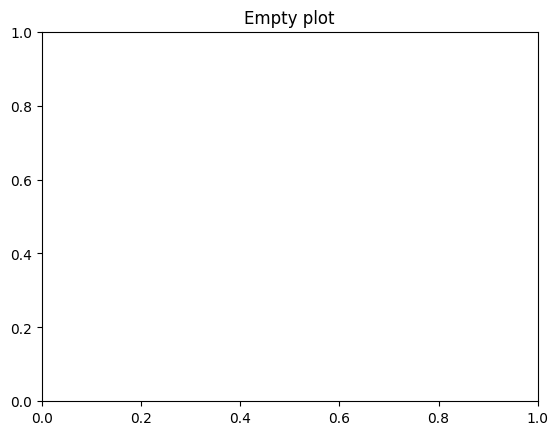

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
# Set the title of plot
ax.set_title("Empty plot")

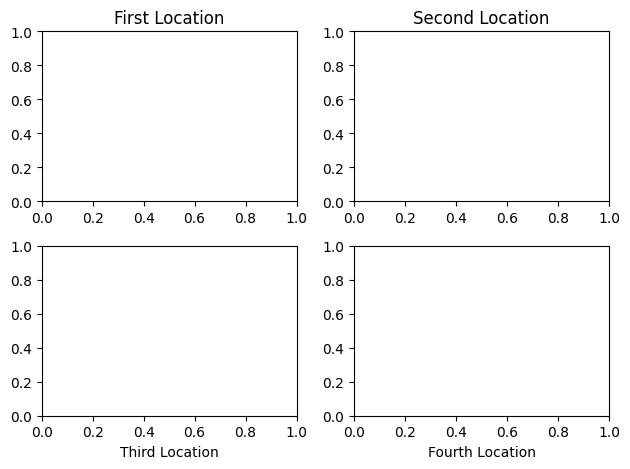

In [ ]:
fig = plt.figure()

# Generate a grid of 2x2 subplots
# Axes object for 1st location
ax1 = fig.add_subplot(2,2,1)
ax1.set_title('First Location')

# Axes object for 2nd location
ax2 = fig.add_subplot(2,2,2)
ax2.set_title('Second Location')

# Axes object for 3rd location
ax3 = fig.add_subplot(2,2,3)
ax3.set_xlabel('Third Location')

# Axes object for 4th location
ax4 = fig.add_subplot(2,2,4)
ax4.set_xlabel('Fourth Location')

# Nice layout and display
plt.tight_layout()
plt.show()

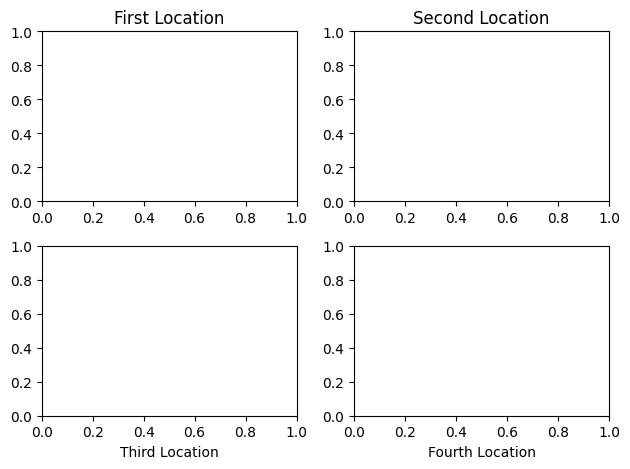

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.set_title('First Location')
ax2.set_title('Second Location')
ax3.set_xlabel('Third Location')
ax4.set_xlabel('Fourth Location')
plt.tight_layout()

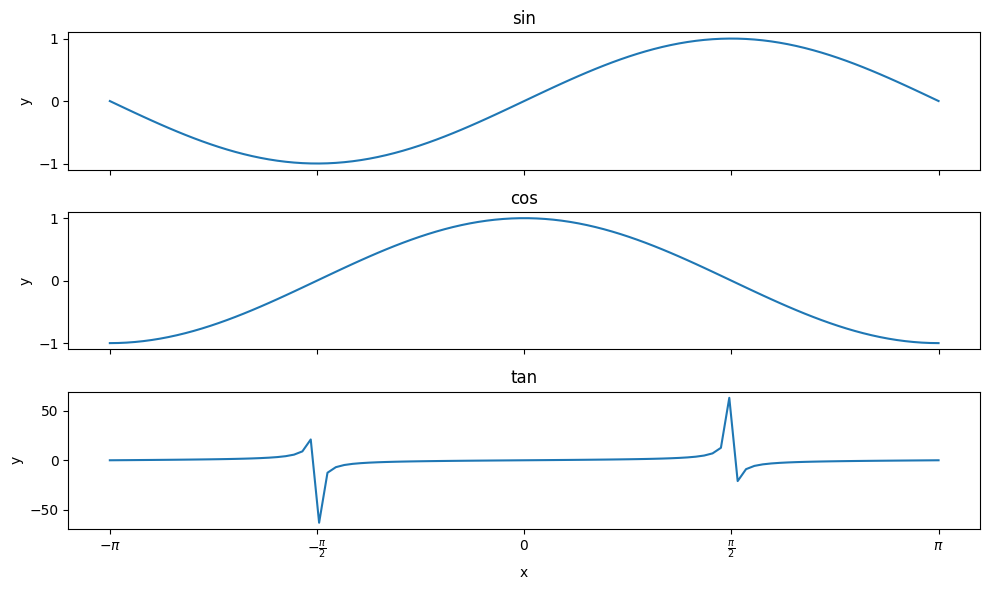

In [ ]:
# Import ticker to control tick labels and positions
import matplotlib.ticker as tck

# Generate the x-axes grid
x = np.linspace(-np.pi, np.pi, 100, endpoint=True)

# Figure
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)
fig.set_dpi(100)
fig.set_size_inches(10,6)

# First plot - sine
ax1.plot(x, np.sin(x))
ax1.set_title("sin")
ax1.set_ylabel("y")

# Second plot - cosine
ax2.plot(x, np.cos(x))
ax2.set_title("cos")
ax2.set_ylabel("y")

# Third plot - tangens
ax3.plot(x, np.tan(x))
ax3.set_title("tan")
ax3.set_ylabel("y")
ax3.set_xlabel("x")

# Set ticks for the shared axes on the bottom of the plot
x_ticks = np.arange(-np.pi,np.pi+np.pi/2,step=(np.pi/2))
ax3.set_xticks(x_ticks, [r'$-\pi$', r'$-\frac{\pi}{2}$', r'$0$', r'$\frac{\pi}{2}$', r'$\pi$'])

plt.tight_layout()

### Plotting from a Pandas Dataframe

In [ ]:
import pandas as pd

data = {'exp_name': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
        'solvent': ['MeOH', 'DCM', 'EtOAc', 'Toluene', 'hexanes', 'MeOH', 'DCM', 'EtOAc', 'Toluene', 'hexanes'],
        'temp_C': [60, 60, 60, 60, 60, 80, 80, 80, 80, 80],
        'pdt_a_yield': [50, 65, 40, 30, 5, 60, 75, 50, 40, 10],
        'side_pdt_yield': [20, 5, 30, 5, 15, 25, 5, 35, 10, 20]
        }

# create pandas dataframe from a dictionary
df = pd.DataFrame(data)

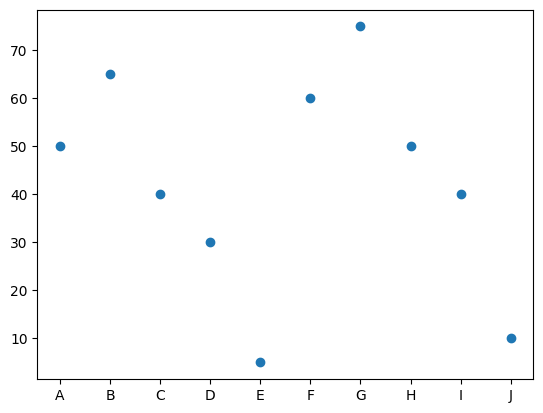

In [ ]:
plt.scatter(df['exp_name'], df['pdt_a_yield'])

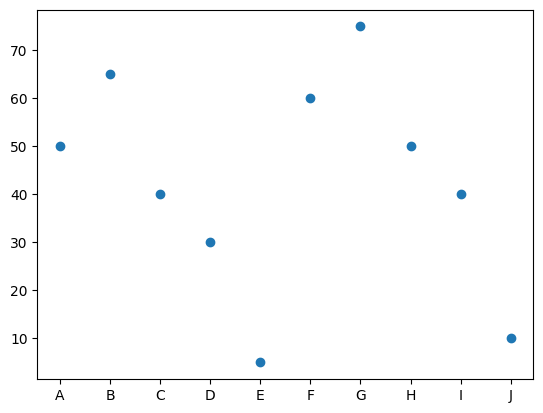

In [ ]:
plt.scatter('exp_name', 'pdt_a_yield', data=df)

### Interactive Plots using Plotly

In [ ]:
import plotly.express as px

In [ ]:
fig = px.scatter(df, x='exp_name', y='pdt_a_yield')
fig.show()

Reference for more details:

*   Plotly: https://plotly.com/python/
*   Molplotly: https://github.com/wjm41/molplotly

### Contour Plots

Displays three-dimensional data in two dimensions using contours or color-coded regions.

Data Preparation

In [ ]:
# download data - hydrogen atom orbitals

!gdown --id 1UuvjGr6jACSTZxcyaoPPxfJykrZBymUV

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1UuvjGr6jACSTZxcyaoPPxfJykrZBymUV
To: /content/px_2D.xlsx
100% 19.5k/19.5k [00:00<00:00, 33.5MB/s]


In [ ]:
import pandas as pd

In [ ]:
px_orbital = pd.read_excel('/content/px_2D.xlsx', header=None)
px_orbital.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0,-20.000000,-19.000000,-18.000000,-17.000000,-16.000000,-15.000000,-14.000000,-13.000000,-12.000000,...,11.000000,12.000000,13.000000,14.000000,15.000000,16.000000,17.000000,18.000000,19.000000,20.000000
1,-20,0.000353,0.000410,0.000472,0.000538,0.000606,0.000675,0.000742,0.000805,0.000861,...,-0.000905,-0.000861,-0.000805,-0.000742,-0.000675,-0.000606,-0.000538,-0.000472,-0.000410,-0.000353
2,-19,0.000432,0.000503,0.000582,0.000665,0.000753,0.000842,0.000930,0.001013,0.001087,...,-0.001147,-0.001087,-0.001013,-0.000930,-0.000842,-0.000753,-0.000665,-0.000582,-0.000503,-0.000432
3,-18,0.000524,0.000614,0.000712,0.000818,0.000930,0.001045,0.001158,0.001267,0.001364,...,-0.001445,-0.001364,-0.001267,-0.001158,-0.001045,-0.000930,-0.000818,-0.000712,-0.000614,-0.000524
4,-17,0.000632,0.000744,0.000866,0.001000,0.001141,0.001287,0.001433,0.001573,0.001701,...,-0.001809,-0.001701,-0.001573,-0.001433,-0.001287,-0.001141,-0.001000,-0.000866,-0.000744,-0.000632


In [ ]:
x = px_orbital.iloc[0, 1:]
y = px_orbital.iloc[1:, 0]
px_values = px_orbital.iloc[1:, 1:]

In [ ]:
# type(x)
# type(y)
# type(px_values)

In [ ]:
px_values.head()

,1,2,3,4,5,6,7,8,9,10,...,32,33,34,35,36,37,38,39,40,41
1,0.000353,0.000410,0.000472,0.000538,0.000606,0.000675,0.000742,0.000805,0.000861,0.000905,...,-0.000905,-0.000861,-0.000805,-0.000742,-0.000675,-0.000606,-0.000538,-0.000472,-0.000410,-0.000353
2,0.000432,0.000503,0.000582,0.000665,0.000753,0.000842,0.000930,0.001013,0.001087,0.001147,...,-0.001147,-0.001087,-0.001013,-0.000930,-0.000842,-0.000753,-0.000665,-0.000582,-0.000503,-0.000432
3,0.000524,0.000614,0.000712,0.000818,0.000930,0.001045,0.001158,0.001267,0.001364,0.001445,...,-0.001445,-0.001364,-0.001267,-0.001158,-0.001045,-0.000930,-0.000818,-0.000712,-0.000614,-0.000524
4,0.000632,0.000744,0.000866,0.001000,0.001141,0.001287,0.001433,0.001573,0.001701,0.001809,...,-0.001809,-0.001701,-0.001573,-0.001433,-0.001287,-0.001141,-0.001000,-0.000866,-0.000744,-0.000632
5,0.000757,0.000894,0.001046,0.001212,0.001389,0.001574,0.001760,0.001940,0.002106,0.002247,...,-0.002247,-0.002106,-0.001940,-0.001760,-0.001574,-0.001389,-0.001212,-0.001046,-0.000894,-0.000757


Creating a contour plot

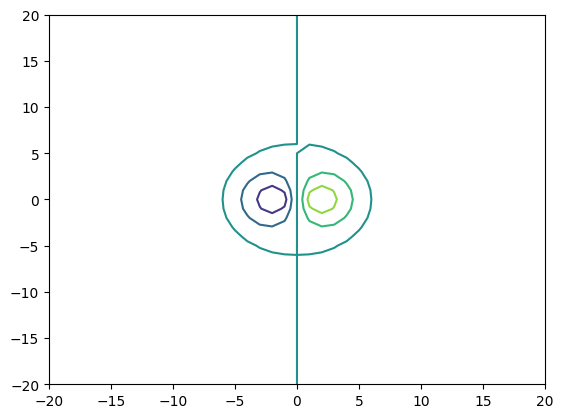

In [ ]:
# line-only contour plot

plt.contour(x, y, px_values)

plt.show()

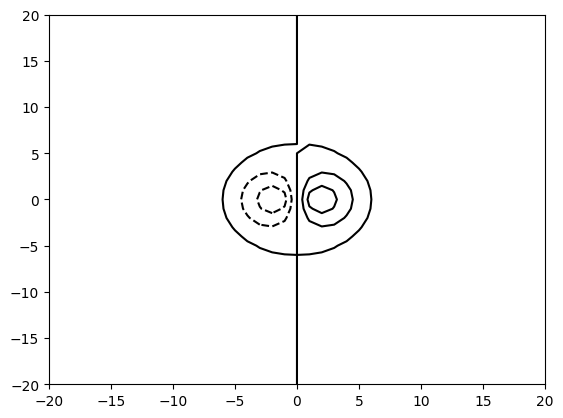

In [ ]:
# line-only contour plot with color

plt.contour(x, y, px_values, colors='black')

plt.show()

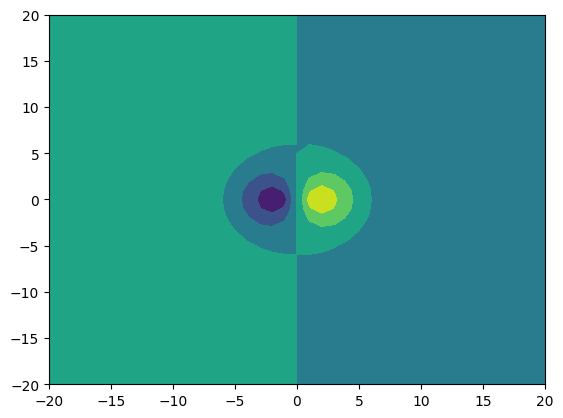

In [ ]:
# filled contour plot

plt.contourf(x, y, px_values)

plt.show()

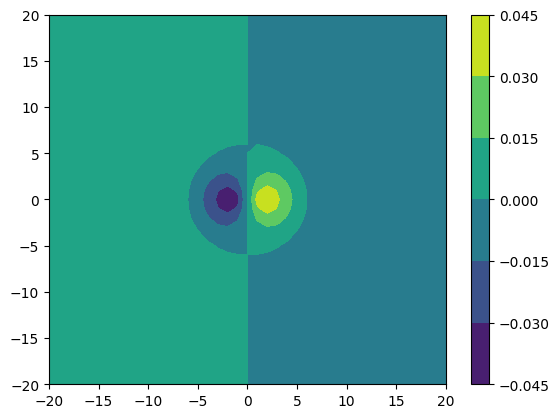

In [ ]:
# add colorbar

plt.contourf(x, y, px_values)

plt.colorbar()

plt.show()

In [ ]:
help(plt.cm)

Help on module matplotlib.cm in matplotlib:

NAME
    matplotlib.cm - Builtin colormaps, colormap handling utilities, and the `ScalarMappable` mixin.

DESCRIPTION
    .. seealso::
    
      :doc:`/gallery/color/colormap_reference` for a list of builtin colormaps.
    
      :doc:`/tutorials/colors/colormap-manipulation` for examples of how to
      make colormaps.
    
      :doc:`/tutorials/colors/colormaps` an in-depth discussion of
      choosing colormaps.
    
      :doc:`/tutorials/colors/colormapnorms` for more details about data
      normalization.

CLASSES
    builtins.object
        ScalarMappable
    collections.abc.Mapping(collections.abc.Collection)
        ColormapRegistry
    
    class ColormapRegistry(collections.abc.Mapping)
     |  ColormapRegistry(cmaps)
     |  
     |  Container for colormaps that are known to Matplotlib by name.
     |  
     |  The universal registry instance is `matplotlib.colormaps`. There should be
     |  no need for users to instantiate `

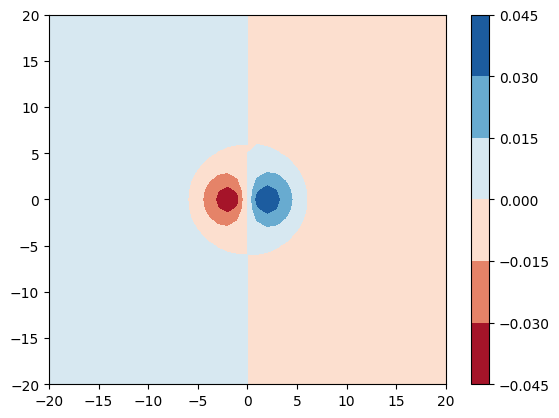

In [ ]:
# add color map

plt.contourf(x, y, px_values, cmap='RdBu')

plt.colorbar()

plt.show()

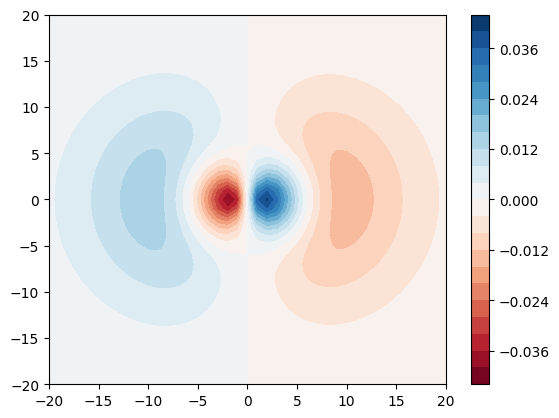

In [ ]:
# add levels (for changing number of contour lines)

plt.contourf(x, y, px_values, cmap='RdBu', levels=25)

plt.colorbar()

plt.show()

Color bar text label:

https://stackoverflow.com/questions/15908371/matplotlib-colorbars-and-its-text-labels

<ipython-input-173-6b6451d81a79>:3: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



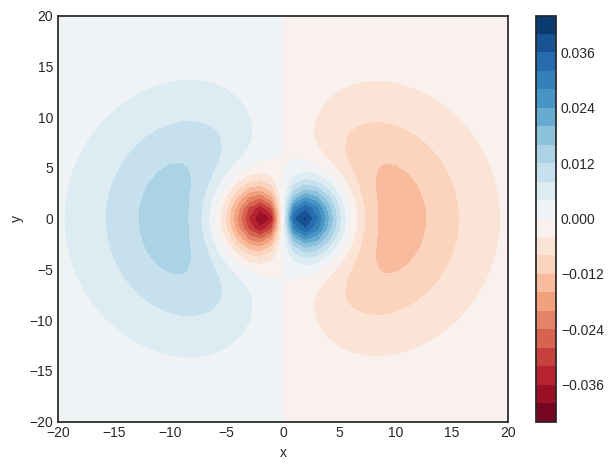

In [ ]:
# add style, x & y labels, tight layout

plt.style.use('seaborn-white')

plt.contourf(x, y, px_values, cmap='RdBu', levels=25)

plt.colorbar()

plt.xlabel('x')
plt.ylabel('y')

plt.tight_layout()
plt.show()

### Plotting Exercises

1. Poll the class for their favorite fruit! Based on the answers, create a pie chart, make sure the slices are labeled with the fruit name and the percent. For an extra challenge, change the color of the slice to correspond with the color of the fruit (if there are multiple fruits with the same color, choose a different shade). 

2. Create two lists of numbers: `list1` will be the integers from 0 to 9 and `list2` will be the elements of list1 squared. Plot the two lists with matplotlib and make some changes to the color, linestyle, or linewidth. Add labels, a title, and a legend to your plot. Save the plot once you are done. 

3. Plot the functions $y_1(x)=3+e^{−𝑥}\sin(6 x)$ and $y_2(x)=4+e^{-x} \cos(6x)$ for $0\leq x \leq 5$ on a single axis. Give the plot axis labels, a title, and a legend.

4. A cycloid is the curve traced by a point located on the edge of a wheel rolling along a flat surface. The $(x,y)$ coordinates of a cycloid generated from a wheel with radius, $r$, can be described by the parametric equations:
$$ x = r (\phi - \sin \phi), \qquad  y = r (1-\cos\phi) $$
where $\phi$ is the number in radians that the wheel has rolled through. Generate a plot of the cycloid for $\phi \in [0,2\pi]$ using 1000 increments and $r=3$. Give your plot a title and labels. Turn the grid on and modify the axis limits to make the plot neat.

5. Using the `Netflix` Pandas DataFrame you created earlier, plot a histogram of the release years of the titles. Use a log scale on the y axis. Give the plot axis labels and a title.
<details>
<summary>Hint</summary>
Create a NumPy array of the release years first.
</details>

6. Generate 1000 normally distributed random numbers using the `np.random.randn` function. Use the `plt.hist` function to plot a histogram of the randomly generated numbers. Use the `plt.hist` function to distribute the randomly generated numbers into 10 bins. Create a bar graph of output of hist using the `plt.bar` function. It should look very similar to the plot produced by `plt.hist`.

## 4. Packages and Documentation
<a id='packdoc'></a>

Documentation for built in Python functions [here](https://docs.python.org/3/)

There's no need to reinvent the wheel. Often, even for specialized tasks, there are packages that have already been written. 

Packages at [Python Package Index](https://pypi.org/) (PyPI)

Understanding how to use a package can be the hardest part. Documentation is your friend!

[Matplotlib documentation](https://matplotlib.org/)

If you encounter any issues, [stack overflow](https://stackoverflow.com/) is a great place to start looking for solutions. 

## 5. Using Python beyond bootcamp
<a id='beyond'></a>

While Google CoLab is a great environment for learning and trying Python for the first time, it can be inconvenient if you want to use it long term. Uploading files each time you connect the notebook and downloading any results can be tedious. Using Python in a different environment will be beneficial for a real project. 

By installing Anaconda, you can streamline your Python development process, simplify package management, and leverage a rich ecosystem of pre-installed libraries and tools. 

Once you have conda is installed you will need to install some additional packages for today's bootcamp
```
conda install ipywidgets
conda install ipympl
conda install tqdm
conda install seaborn
```



### Conda environments
It is useful to be able to make a new conda environment using 

``` conda create --name myenv ```

which will create a brand new installation of python with no packages. This will allow you to install new packages that conflict with others or managing libraries that require specific dependencies.

You can install packages into that environment using 

``` conda install -n myenv package-name ```

Finally, to actually use that environment you must activate it using the command 

```conda activate myenv```

You will know this worked because your command line prompt will now have ```(myenv)``` to the left of it. This will make it so that running python (via an IDE or jupyter notebook) will only use the packages you installed in that environment

## 6. GitHub
<a id='github'></a>

https://github.com/losertlab/Python-Bootcamp-Day2